# Analysis on Adidas Data 

## Data Description

#### Data Source:
* Open Dataset of Adidas Company Shoe sales
* Adidas DataSet: https://www.kaggle.com/datasets/mohammadashour20/adiddas-data

In [1]:
# Importing the required packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from scipy import stats


In [2]:
#reading the adidas data from my locaL storage
df=pd.read_csv('data.csv')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","60,000","$30,000",In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","50,000","$15,000",In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","40,000","$14,000",In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"38,250","$13,388",In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"54,000","$16,200",In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,320,$90,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,431,$138,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,754,$279,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,294,$123,Outlet


In [3]:
#checking the datatypes
df.dtypes

Retailer            object
Retailer ID          int64
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Sales Method        object
dtype: object

In [4]:
#coverting the datatypes
df=df.convert_dtypes()
df.dtypes

Retailer            string
Retailer ID          Int64
Invoice Date        string
Region              string
State               string
City                string
Product             string
Price per Unit      string
Units Sold          string
Total Sales         string
Operating Profit    string
Sales Method        string
dtype: object

## Data Cleaning

In [5]:
#finding the null values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              7
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [6]:
# Checking unique values in Region column which has null values
df['Region'].unique()

<StringArray>
['Northeast', 'South', <NA>, 'West', 'Midwest', 'Southeast']
Length: 6, dtype: string

In [7]:
# function filling the null values
def unknown_fill(x):
    return x.fillna('Unknown') 

In [8]:
# Filling unknown values inplace of null values
df['Region']=df['Region'].transform(unknown_fill)

In [9]:
# Checking if null values are filled or not
df.Region.value_counts()

West         2446
Northeast    2376
Midwest      1869
South        1726
Southeast    1224
Unknown         7
Name: Region, dtype: Int64

In [10]:
# Checking unique values in Price per Unit column which has null values
df['Price per Unit'].unique()

<StringArray>
[ '$50.00 ',  '$40.00 ',  '$45.00 ',  '$60.00 ',       <NA>,  '$55.00 ',
  '$65.00 ',  '$70.00 ',  '$25.00 ',  '$35.00 ',  '$30.00 ',  '$80.00 ',
  '$75.00 ',  '$20.00 ',  '$85.00 ', '$100.00 ',  '$90.00 ',  '$95.00 ',
  '$15.00 ',  '$10.00 ', '$110.00 ', '$105.00 ',  '$47.00 ',  '$36.00 ',
  '$41.00 ',  '$46.00 ',  '$44.00 ',  '$58.00 ',  '$48.00 ',  '$39.00 ',
  '$43.00 ',  '$59.00 ',  '$56.00 ',  '$49.00 ',  '$54.00 ',  '$64.00 ',
  '$53.00 ',  '$61.00 ',  '$62.00 ',  '$68.00 ',  '$52.00 ',  '$66.00 ',
  '$51.00 ',  '$24.00 ',  '$34.00 ',  '$33.00 ',  '$23.00 ',  '$32.00 ',
  '$38.00 ',  '$29.00 ',  '$37.00 ',  '$27.00 ',  '$42.00 ',  '$72.00 ',
  '$63.00 ',  '$69.00 ',  '$76.00 ',  '$67.00 ',  '$57.00 ',  '$28.00 ',
  '$18.00 ',  '$19.00 ',  '$71.00 ',  '$78.00 ',  '$73.00 ',  '$74.00 ',
  '$83.00 ',  '$82.00 ',  '$98.00 ',  '$77.00 ',  '$88.00 ',  '$86.00 ',
  '$14.00 ',   '$9.00 ',  '$97.00 ',  '$81.00 ',  '$79.00 ',  '$96.00 ',
  '$84.00 ',  '$89.00 ', '$103.00 ', 

In [11]:
#replacing symbols ',' and '$' and converting the values of price per unit into float
df['Price per Unit'] = df['Price per Unit'].str.replace(",","")
df['Price per Unit'] = df['Price per Unit'].str.replace("$","")
df['Price per Unit'] = df['Price per Unit'].astype(float)

In [12]:
# function filling mean values in place of null values
def mean_fill(x):
    return x.fillna(x.mean())

In [13]:
# Filled the null values with mean and rounded the mean value to two decimal places
df['Price per Unit']=df['Price per Unit'].transform(mean_fill)
df['Price per Unit'] = df['Price per Unit'].round(2)
df['Price per Unit'].unique()

array([ 50.  ,  40.  ,  45.  ,  60.  ,  45.22,  55.  ,  65.  ,  70.  ,
        25.  ,  35.  ,  30.  ,  80.  ,  75.  ,  20.  ,  85.  , 100.  ,
        90.  ,  95.  ,  15.  ,  10.  , 110.  , 105.  ,  47.  ,  36.  ,
        41.  ,  46.  ,  44.  ,  58.  ,  48.  ,  39.  ,  43.  ,  59.  ,
        56.  ,  49.  ,  54.  ,  64.  ,  53.  ,  61.  ,  62.  ,  68.  ,
        52.  ,  66.  ,  51.  ,  24.  ,  34.  ,  33.  ,  23.  ,  32.  ,
        38.  ,  29.  ,  37.  ,  27.  ,  42.  ,  72.  ,  63.  ,  69.  ,
        76.  ,  67.  ,  57.  ,  28.  ,  18.  ,  19.  ,  71.  ,  78.  ,
        73.  ,  74.  ,  83.  ,  82.  ,  98.  ,  77.  ,  88.  ,  86.  ,
        14.  ,   9.  ,  97.  ,  81.  ,  79.  ,  96.  ,  84.  ,  89.  ,
       103.  , 101.  ,  87.  ,  92.  ,  31.  ,  26.  ,  21.  ,  13.  ,
        22.  ,  17.  ,  12.  ,  16.  ,  11.  ,   7.  ,   8.  ])

In [14]:
# Converting the Units Sold column to int from string by replacing , with space
df['Units Sold'] = df['Units Sold'].str.replace(',','')
df['Units Sold'] = df['Units Sold'].astype(int)

In [15]:
df['Units Sold'].unique()

array([1200, 1000,  850,  900, 1250,  950,  825, 1220,  925,  800,  875,
       1050, 1275, 1025, 1100, 1075, 1150,  975,  920,  700,  550,  675,
        625,  500,  600,  650,  725,  525,  775,  750,  575,  450,  425,
        475,  275,  125,  175,  225,  100,  495,  200,   75,  150,  250,
        350,  325,  400,  375,  300,  195,   50,  445,   25,  470, 1070,
       1125,  745,  145,  420,    0,   95,  545,  570,  320,  870,  820,
        520,  770,  795,  620,  295,  670,  345, 1020, 1045,  695,  945,
        595,  220,  720,  395,  645,  245,  270,  170,  336,  260,  247,
        234,  313,  261,  276,  206,  243,  290,  354,  259,  216,  230,
        238,  252,  239,  215,  317,  278,  305,  319,  267,  231,  286,
        308,  257,  241,  360,  268,  280,  236,  299,  273,  258,  254,
        263,  312,  285,  210,  154,  203,  213,  255,  176,  196,  182,
        174,  189,  163,  147,  232,  168,  169,  293,  297,  181,  240,
        188,  209,  194,  217,  161,  233,  223,  1

In [16]:
# Converting the Total Sales column to int from string by replacing , with space
df['Total Sales'] = df['Total Sales'].str.replace(",","")
df['Total Sales'] = df['Total Sales'].astype(int)
df['Total Sales']

0       60000
1       50000
2       40000
3       38250
4       54000
        ...  
9643      320
9644      431
9645      754
9646      294
9647      241
Name: Total Sales, Length: 9648, dtype: int32

In [17]:
#replacing symbols ',' and '$' and converting the operating profit values in to integer
df['Operating Profit'] = df['Operating Profit'].str.replace(",","")
df['Operating Profit'] = df['Operating Profit'].str.replace("$","")
df['Operating Profit'] = df['Operating Profit'].astype(int)

In [18]:
df['Operating Profit']

0       30000
1       15000
2       14000
3       13388
4       16200
        ...  
9643       90
9644      138
9645      279
9646      123
9647       65
Name: Operating Profit, Length: 9648, dtype: int32

In [19]:
#checking if any duplicate rows are present and removing them if found
df = df.drop_duplicates()
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,320,90,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,431,138,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,754,279,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,294,123,Outlet


In [20]:
# Dropping unnesessary columns from data frame
df= df.drop(['Retailer ID'], axis=1)
df

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,60000,30000,In-store
1,Foot Locker,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,50000,15000,In-store
2,Foot Locker,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,40000,14000,In-store
3,Foot Locker,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,38250,13388,In-store
4,Foot Locker,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900,54000,16200,In-store
...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,320,90,Outlet
9644,Foot Locker,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,431,138,Outlet
9645,Foot Locker,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,754,279,Outlet
9646,Foot Locker,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,294,123,Outlet


## Sanity Checking

<AxesSubplot:>

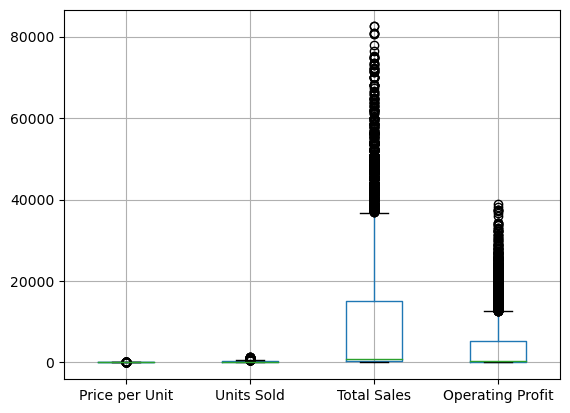

In [21]:
# Using boxplot for finding outliers in dataframe
df.boxplot()

In [22]:
df['Product'].unique()

<StringArray>
[    "Men's Street Footwear",   "Men's Athletic Footwear",
   "Women's Street Footwear", "Women's Athletic Footwear",
             "Men's Apparel",           "Women's Apparel",
              "Men's aparel"]
Length: 7, dtype: string

In [23]:
def str_replace(x):
    return x.replace("Men's aparel","Men's Apparel") 

In [24]:
df['Product']=df['Product'].transform(str_replace)

In [25]:
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

* The Dataframe looks good, lets start analyse by visualization

## Data Visualization

#### Plot for count of values in Retailer column

In [26]:
df.Retailer.value_counts()

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: Int64

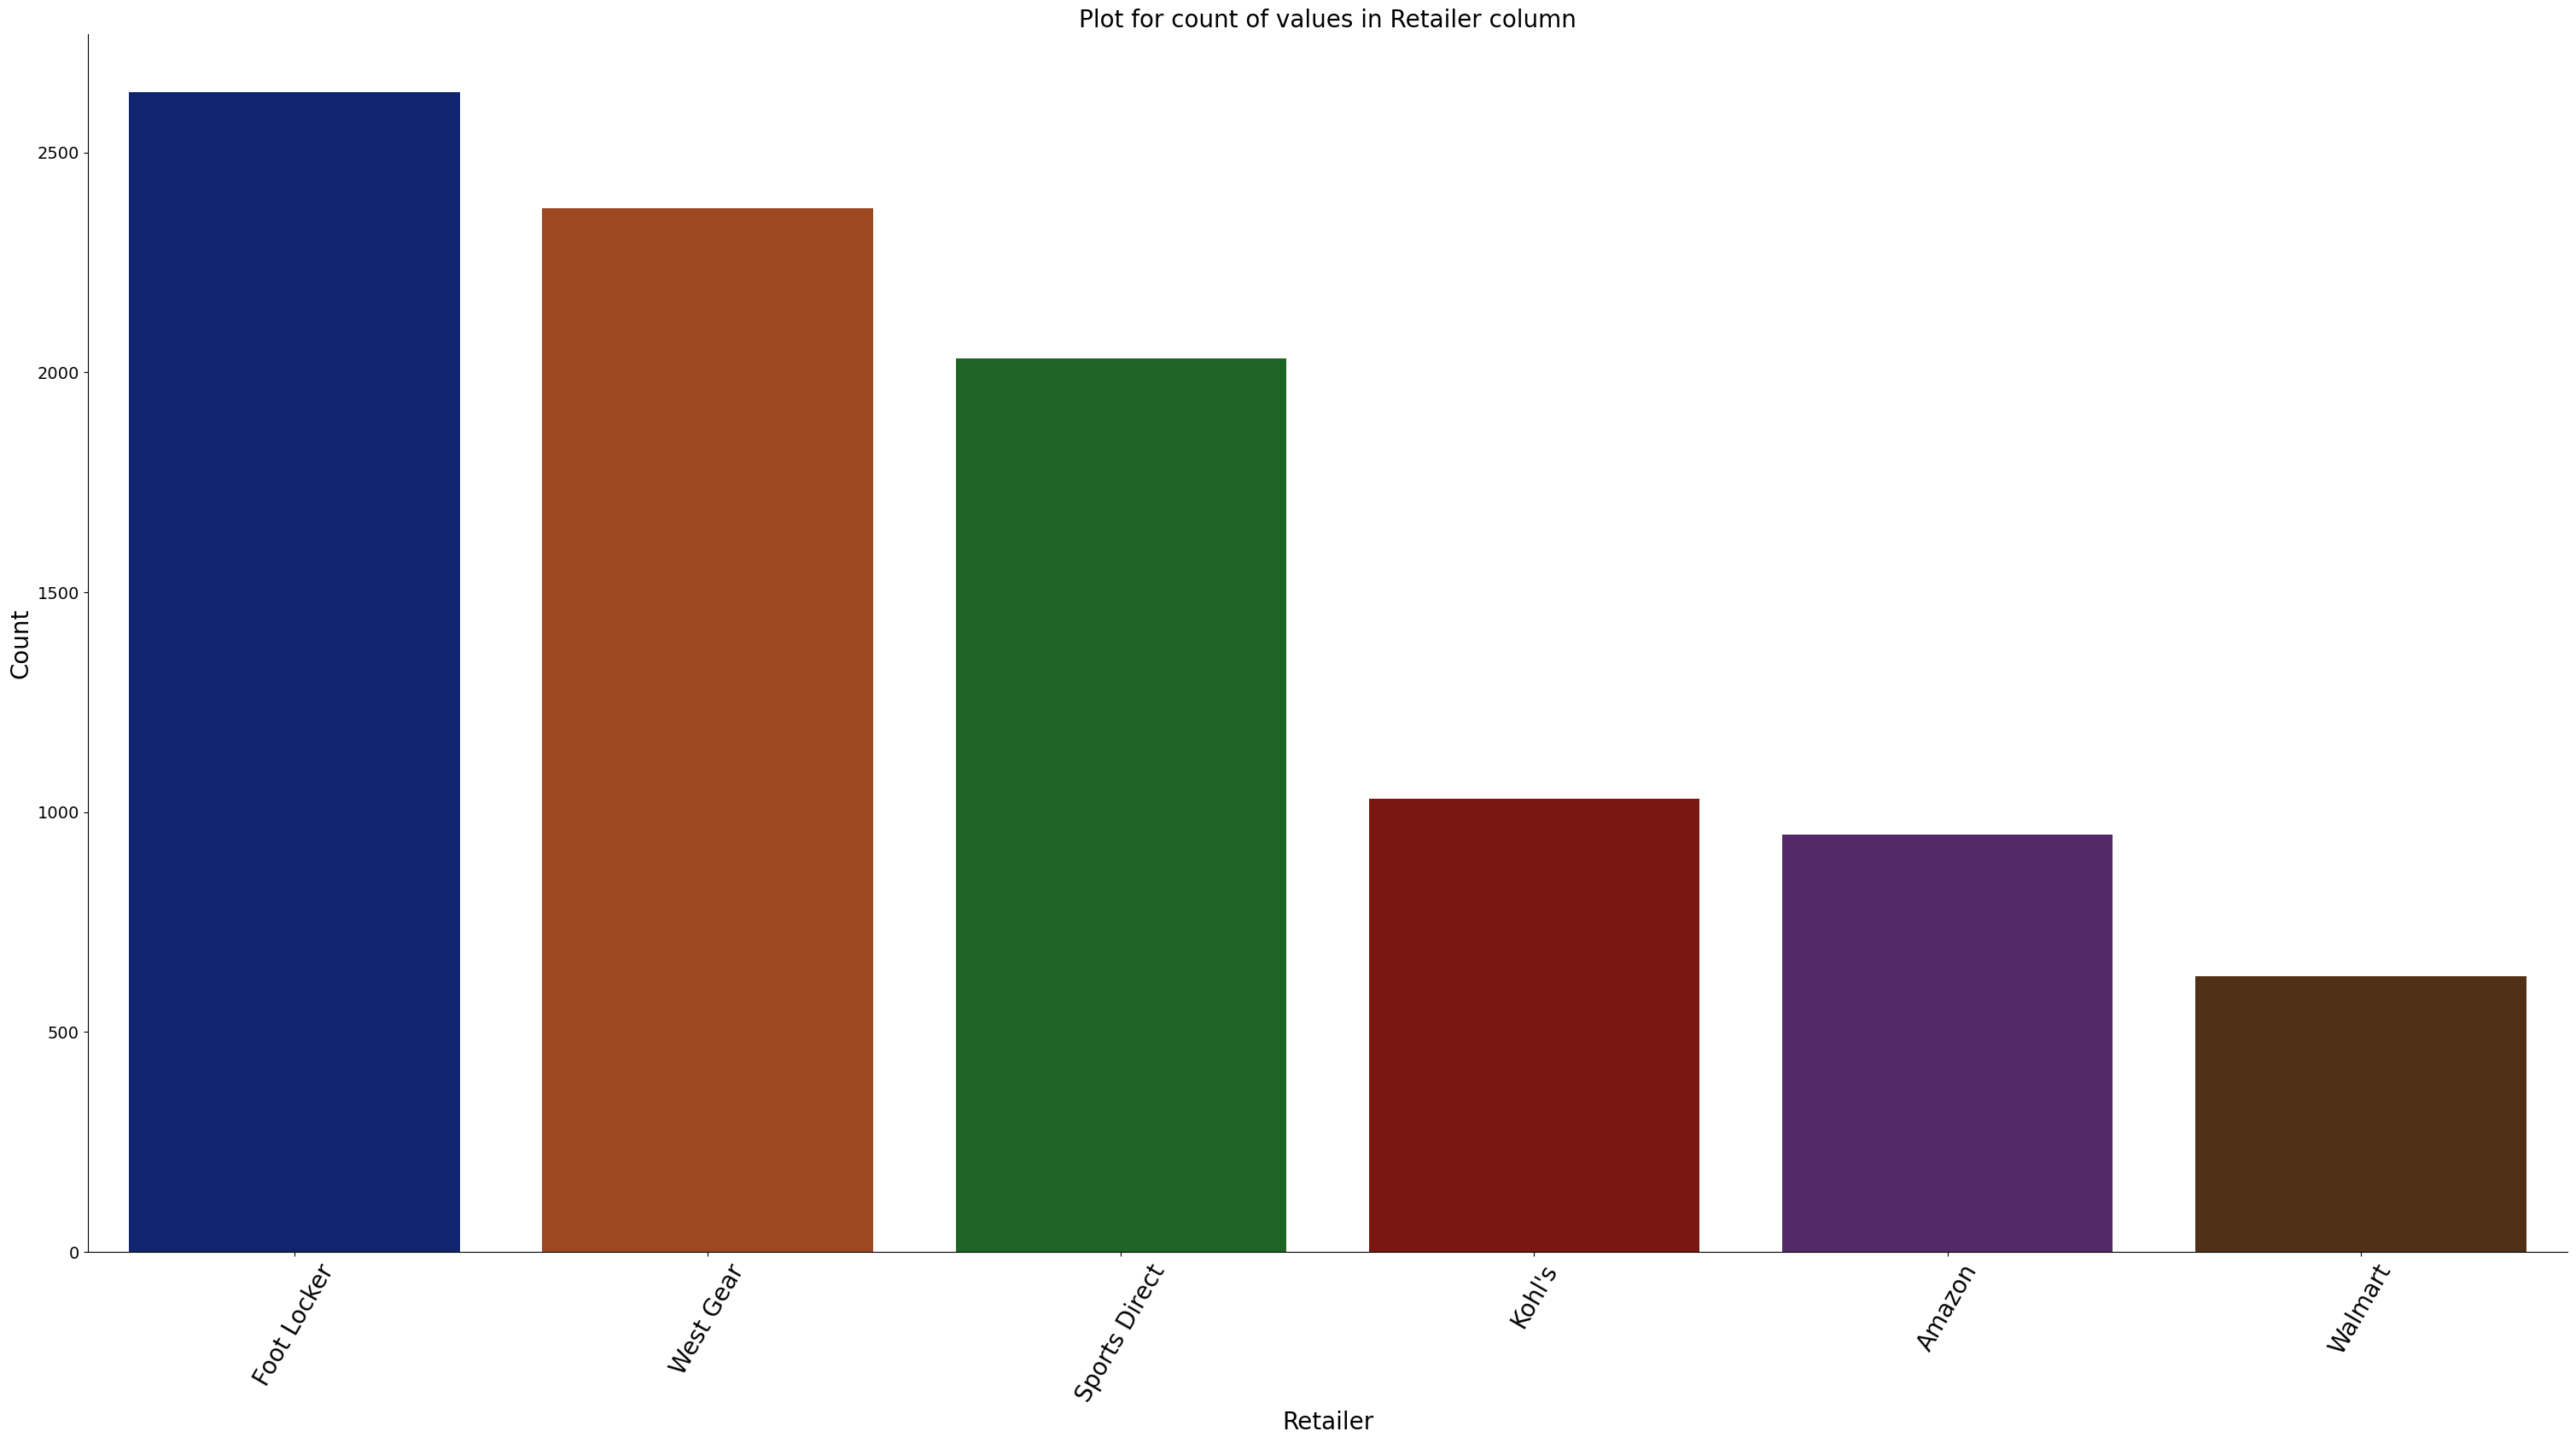

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

Ret_plot = df['Retailer'].value_counts().index # get category order in descending order

sns.catplot(data=df, kind='count', x='Retailer', palette='dark', height=15, aspect=2, order=Ret_plot)
plt.title('Plot for count of values in Retailer column',fontsize=20 )
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize=14)
plt.xlabel('Retailer', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()


#### Plot for Top 10 Invoice Dates by Count

In [28]:
df['Invoice Date'].value_counts()

1/17/2021     77
8/17/2021     72
3/16/2021     72
4/17/2021     72
11/17/2021    71
              ..
11/26/2020     2
11/27/2020     2
11/28/2020     2
11/30/2020     2
6/16/2020      2
Name: Invoice Date, Length: 724, dtype: Int64

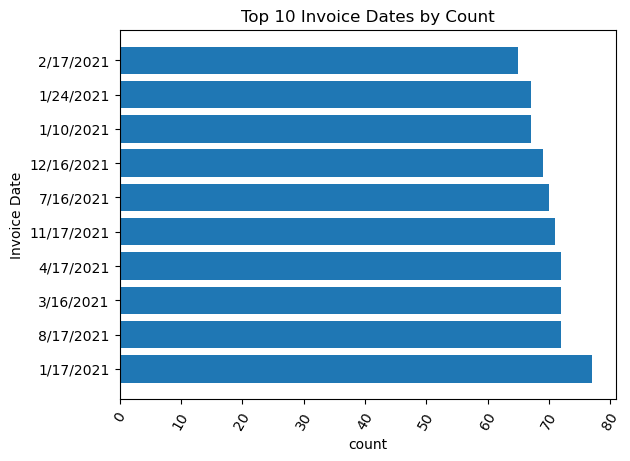

In [29]:
date_counts = df['Invoice Date'].value_counts().head(10) # get top 10 date counts

plt.barh(date_counts.index, date_counts.values)
plt.xticks(rotation=60)
plt.xlabel('count')
plt.ylabel('Invoice Date')
plt.title('Top 10 Invoice Dates by Count')
plt.show()

#### Plot for count of values in each Region 

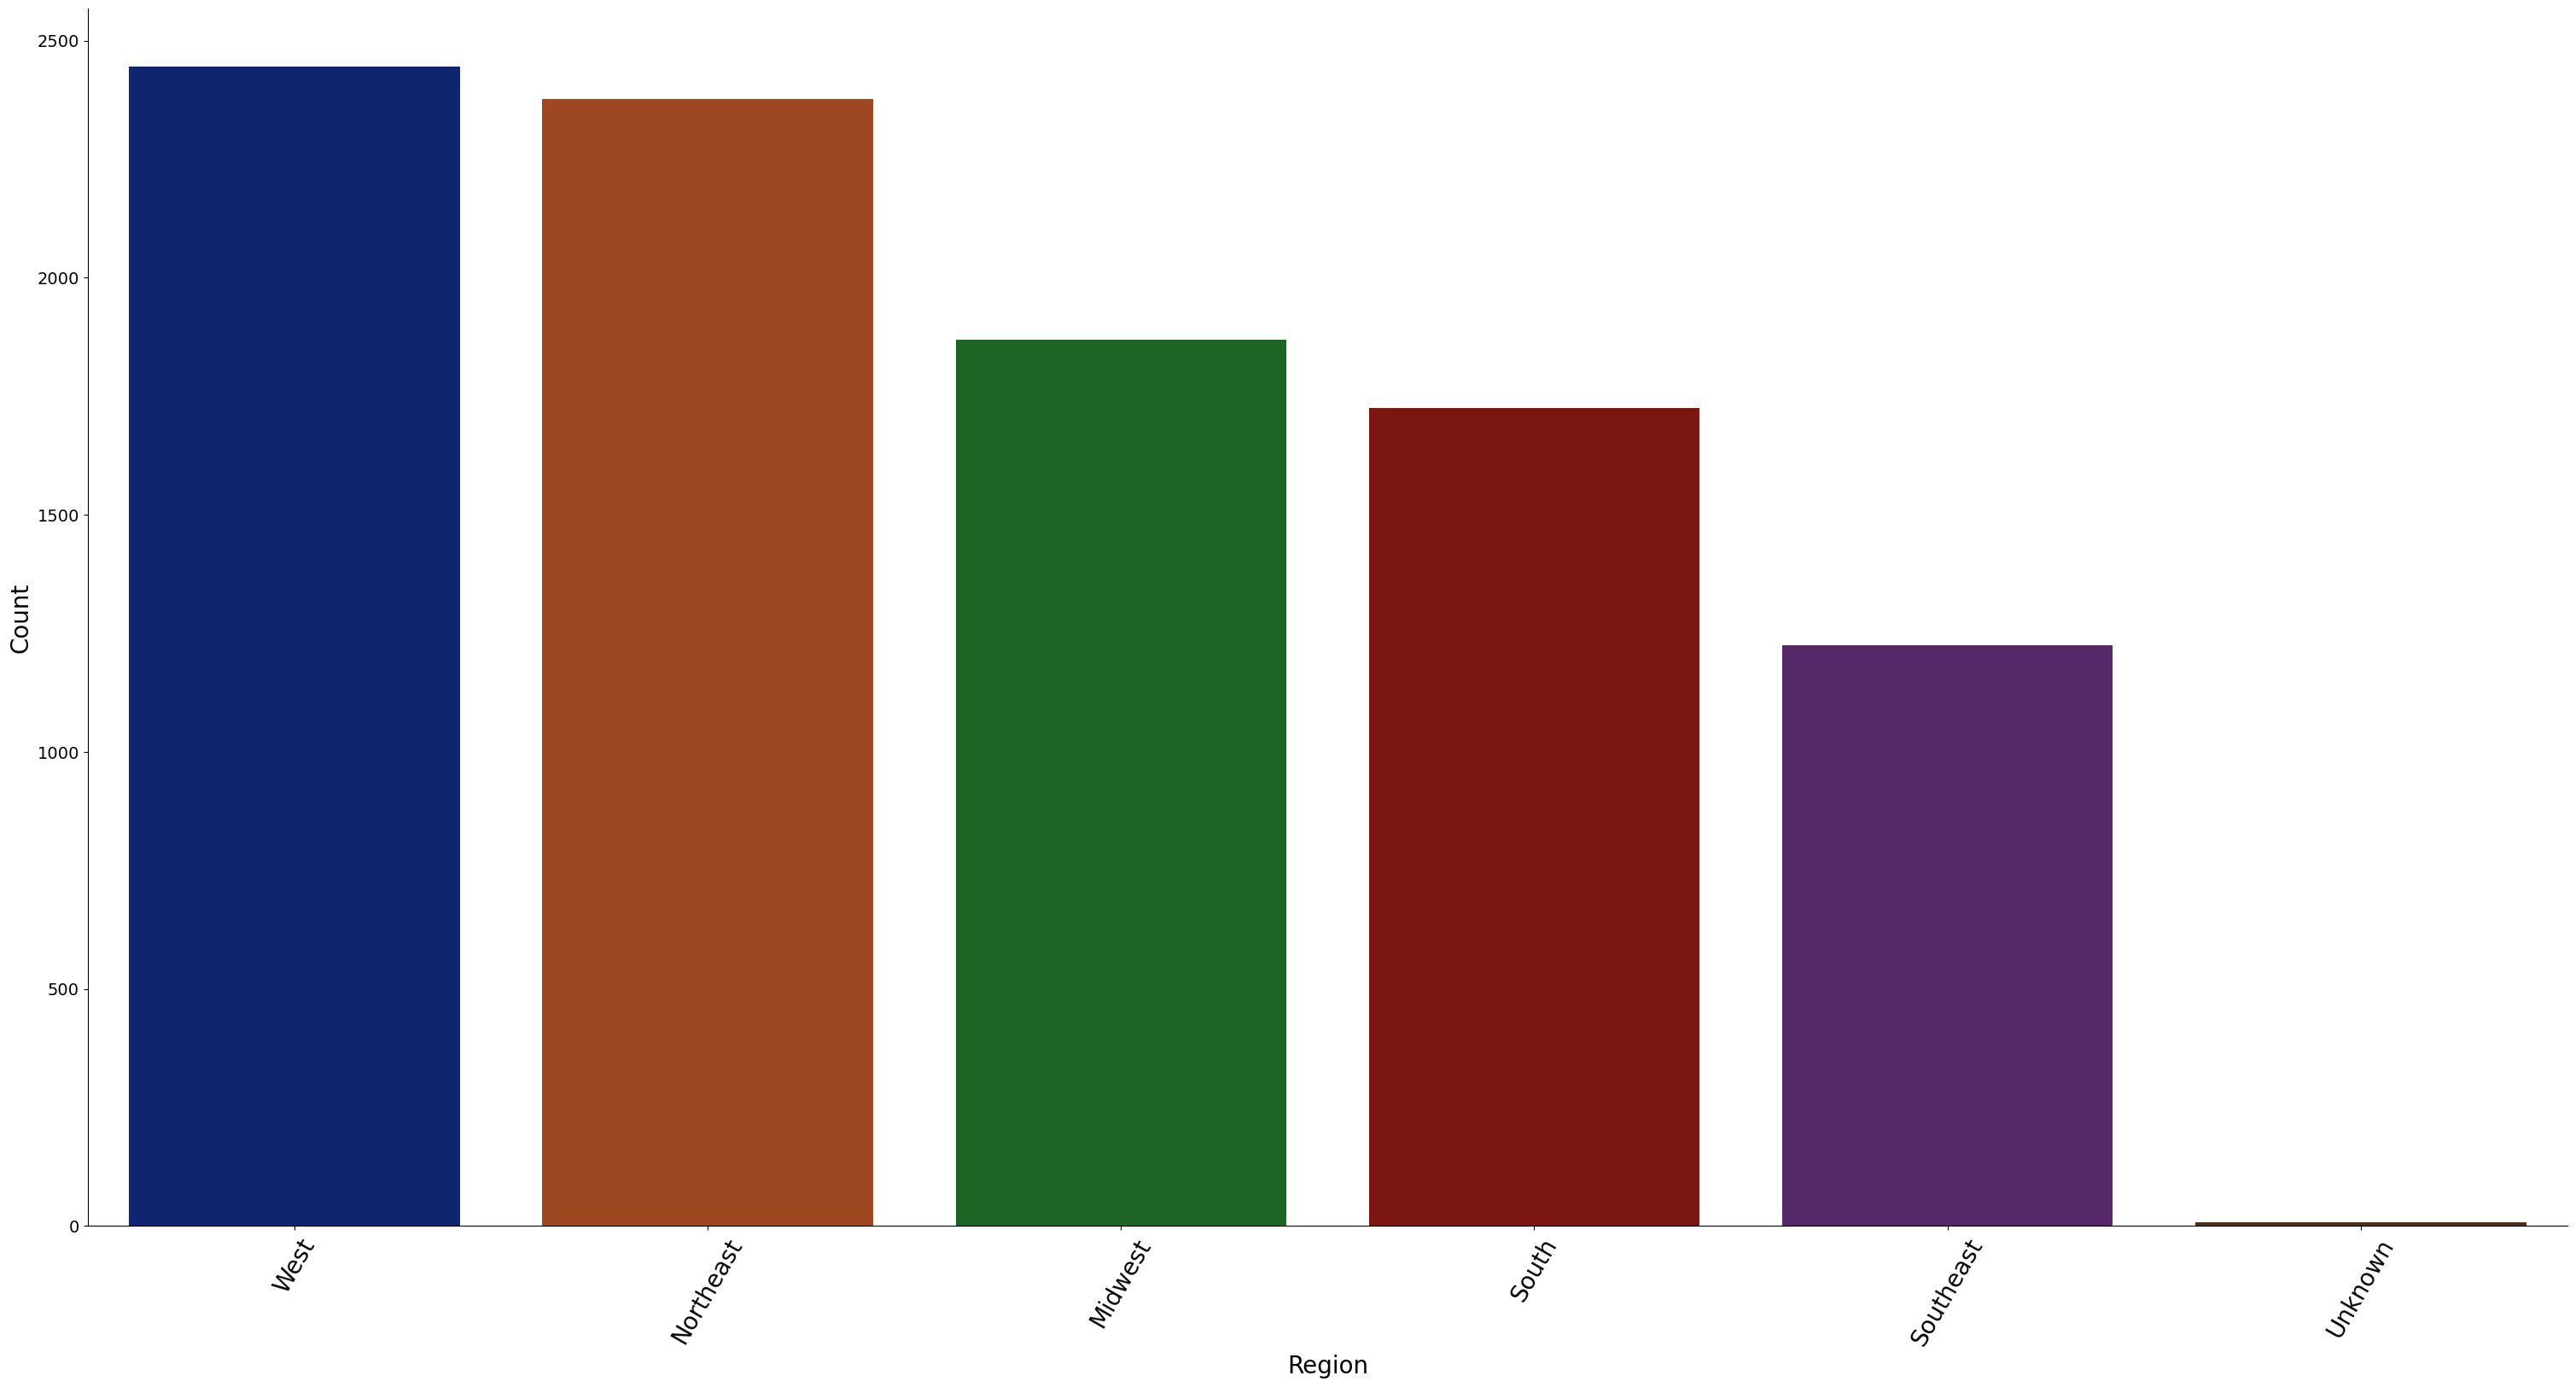

In [30]:
Reg_plot = df['Region'].value_counts().index # get category order in descending order

sns.catplot(data=df, kind='count', x='Region', palette='dark', height=15, aspect=2, order=Reg_plot)
plt.xticks(rotation=60, fontsize=20)
plt.yticks(fontsize=14)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

#### Pie Plot for showing distribution of counts in each State

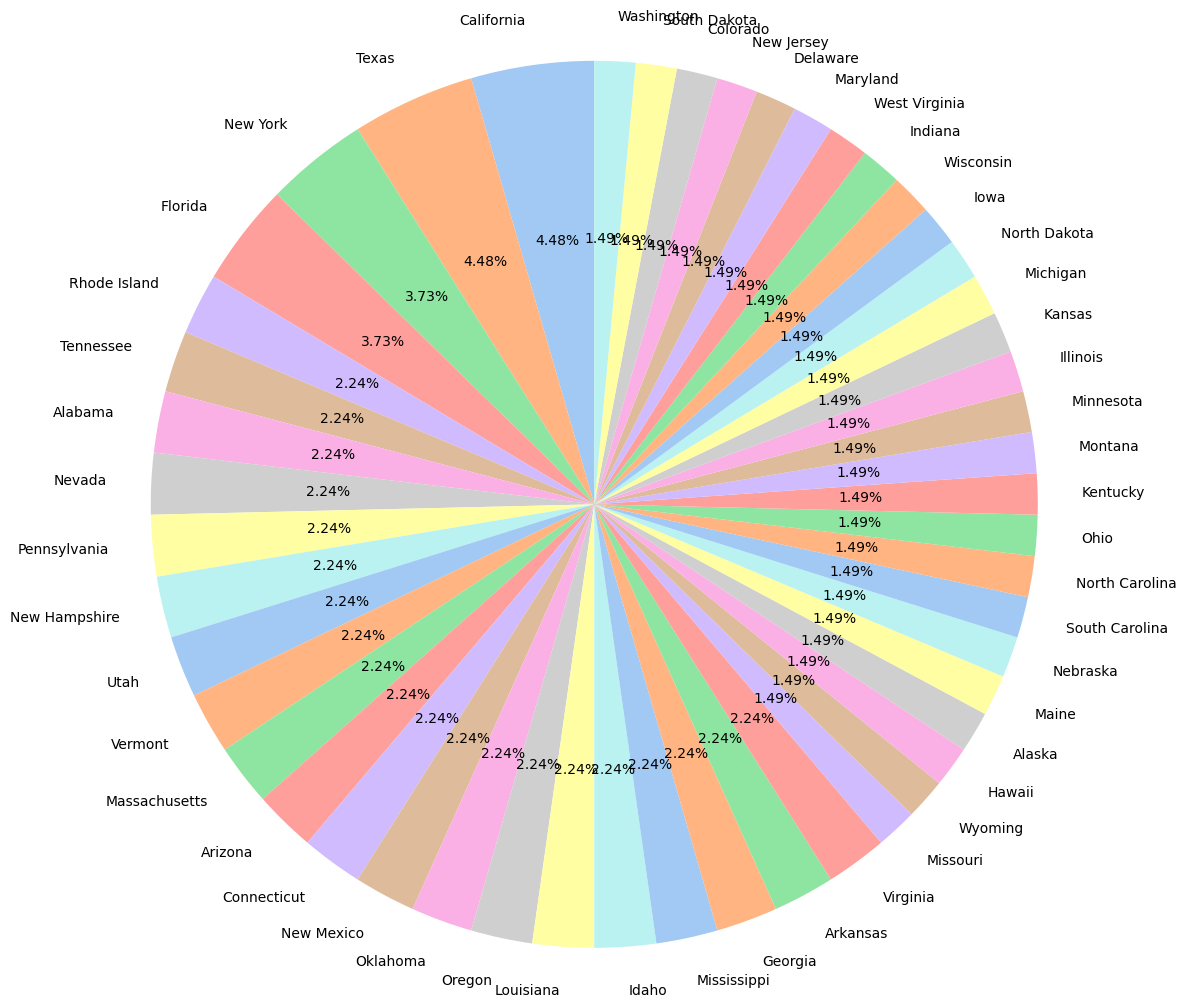

In [31]:
colors = sns.color_palette('pastel')
col_no= df.State.value_counts()
plt.pie(col_no, labels =col_no.index, colors = colors, autopct='%.2f%%', radius = 3, shadow= False, startangle=90)
plt.show()

#### Horizontal Bargraph for Product VS Units Sold

In [32]:
prod_units=df.groupby(['Product'])['Units Sold'].mean() 
prod_units= prod_units.sort_values(ascending= False)
print(prod_units)

Product
Men's Street Footwear        368.521739
Men's Athletic Footwear      270.513043
Women's Apparel              269.792910
Women's Street Footwear      243.948383
Women's Athletic Footwear    197.531756
Men's Apparel                190.960772
Name: Units Sold, dtype: float64


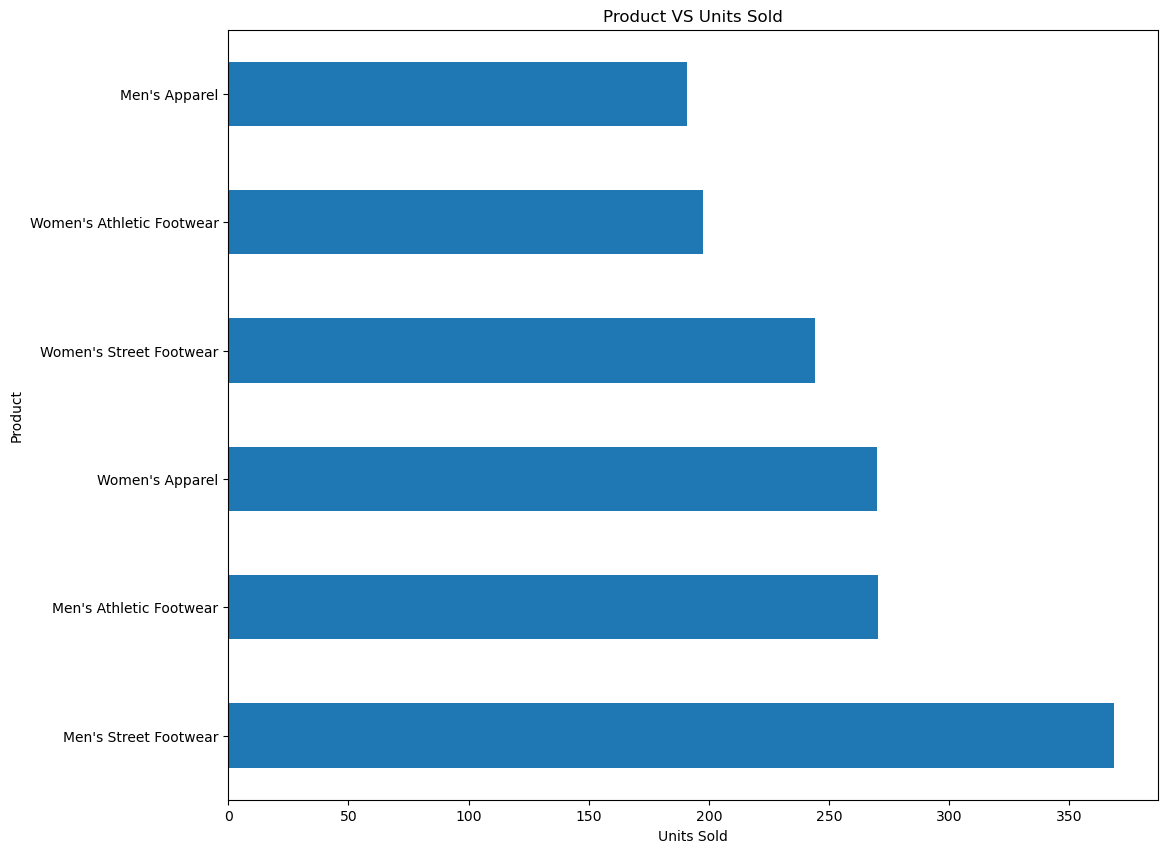

In [33]:
plt.figure(figsize=(12,10))
prod_units.plot(kind="barh")
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.title('Product VS Units Sold')
plt.show()

#### Pie plot showing distribution of Sales Method Column

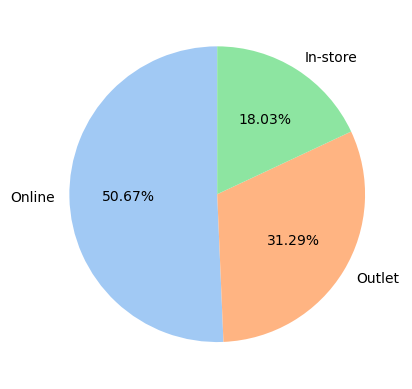

In [34]:
colors = sns.color_palette('pastel')
col_no= df['Sales Method'].value_counts()
plt.pie(col_no, labels =col_no.index, colors = colors, autopct='%.2f%%', radius = 1, shadow= False, startangle=90)
plt.show()

#### Horizontal Barplot for Top 10 Prices and their Frequency

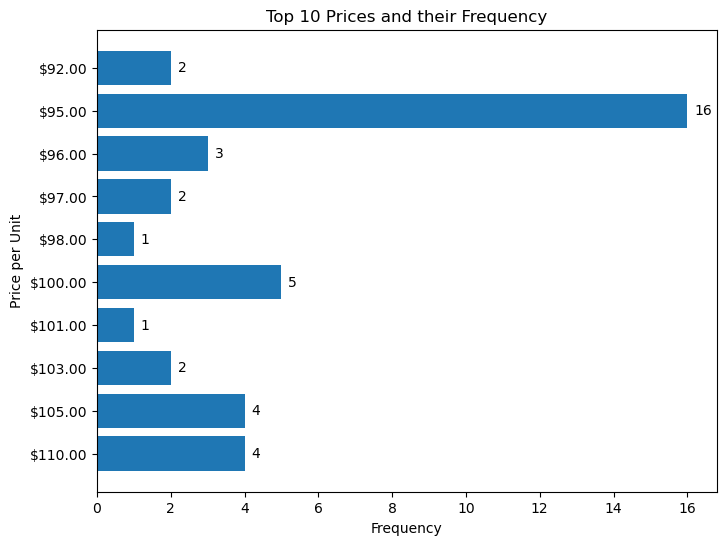

In [35]:
price_plot = df['Price per Unit'].unique()[np.argsort(-df['Price per Unit'].unique())]
top_10_prices = price_plot[:10]
# get the frequency count of each unique price
price_counts = df['Price per Unit'].value_counts()

# create a bar chart of the top 10 prices
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(range(len(top_10_prices)), price_counts[top_10_prices])
ax.set_xlabel('Frequency')
ax.set_ylabel('Price per Unit')
ax.set_title('Top 10 Prices and their Frequency')

# set the y-tick labels to the actual prices
ax.set_yticks(range(len(top_10_prices)))
ax.set_yticklabels(['${:.2f}'.format(price) for price in top_10_prices])

# add labels for the bar values
for i, bar in enumerate(bars):
    value = bar.get_width()
    ax.annotate('{:.0f}'.format(value), xy=(value, i), xytext=(5, 0),
                textcoords='offset points', ha='left', va='center')

plt.show()


#### SNS barplot for Top Total sales in each City

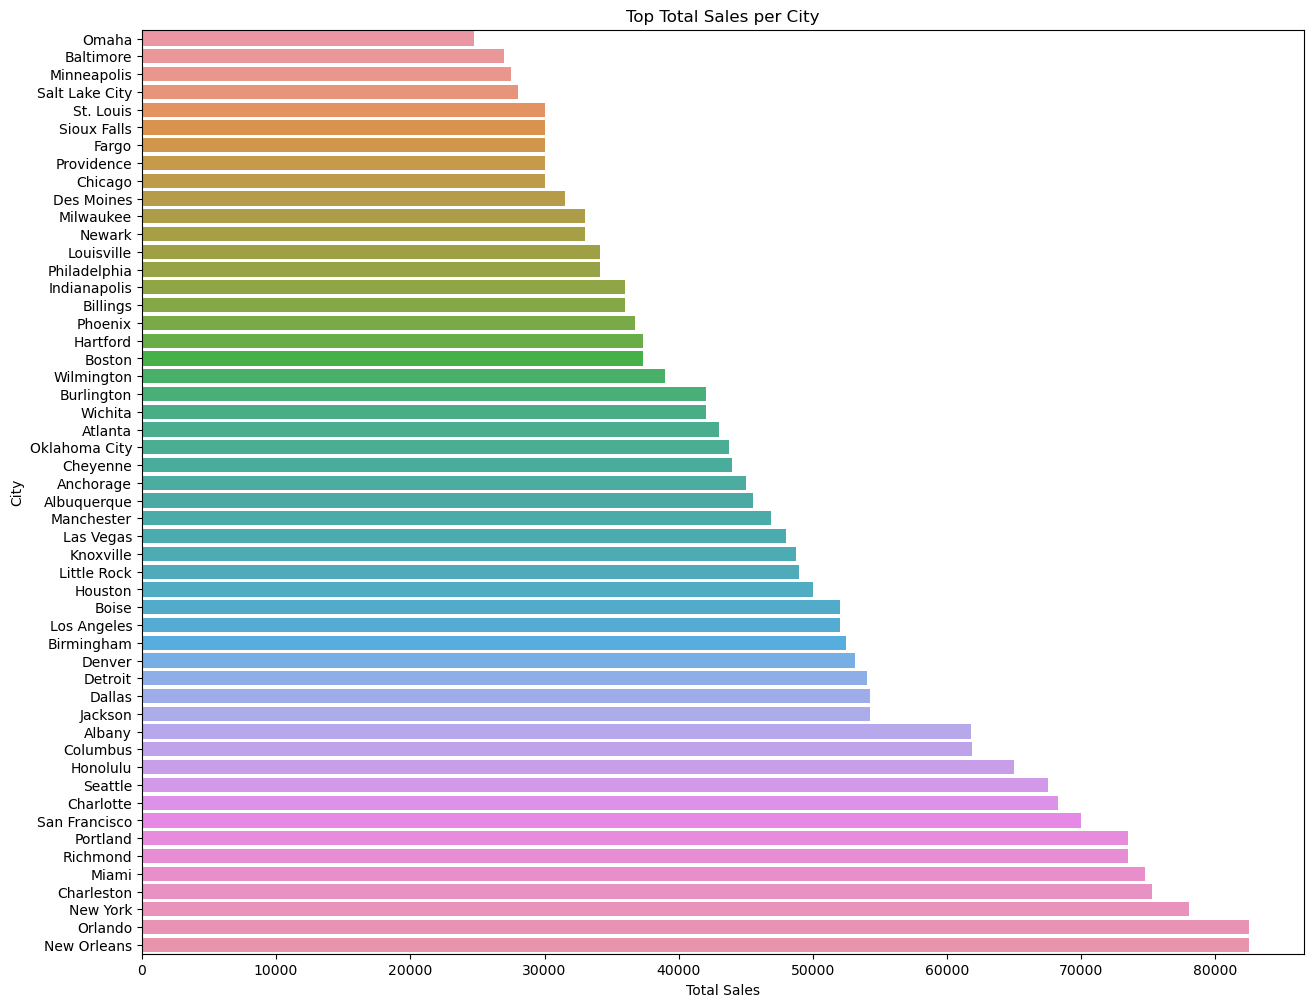

In [36]:
group_col = 'City'
value_col = 'Total Sales'

# get the top value per region
top_df = (df
          .groupby(group_col)[value_col]
          .max()
          .sort_values()
          .reset_index())

# create the bar plot
fig, ax = plt.subplots(figsize=(15,12))
sns.barplot(x=value_col, y=group_col, data=top_df, ax=ax)

ax.set_xlabel(value_col)
ax.set_ylabel(group_col)
ax.set_title(f'Top {value_col} per {group_col}')

plt.show()

#### Violin plot for Top Operating profit per Region

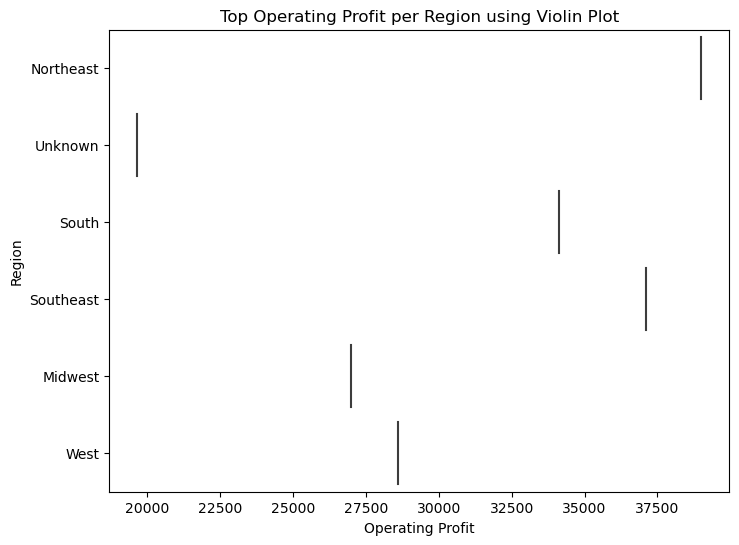

In [37]:
group_col = 'Region'
value_col = 'Operating Profit'

# get the top value per region
top_df = (df
          .groupby(group_col)[value_col]
          .max()
          .sort_values()
          .reset_index())

# merge with original DataFrame to get the rows with the top value per region
merged_df = pd.merge(df, top_df, on=[group_col, value_col], how='inner')

# create the violin plot
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x=value_col, y=group_col, data=merged_df, ax=ax)

ax.set_xlabel(value_col)
ax.set_ylabel(group_col)
ax.set_title(f'Top {value_col} per {group_col} using Violin Plot')

plt.show()

## Summary and Findings

* Foot Locker retailer has the most no. of sales where as Unknown is least
* Most no. of sales happened on date 1/17/2021
* State California has most no. of sales where as State Washington has the least
* Men's Street Footwear product has the most no. of sales where as Men's Apparel has the least
* Online Sales are the most where inline has the least
* Highest Price is 110 dollars with frequency of 4
* New Orleans and Orlando has the top total sales where as omaha has the least
* Northeast has the highest Operating Profit whereas Unknown has the least


## Hypothesis Testing for Adidas Sales Data

<h4>Split the data into two samples, one for California and one for New York</h4>

In [38]:
ca_sales = df[df['State'] == 'California']['Total Sales']
ny_sales = df[df['State'] == 'New York']['Total Sales']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(ca_sales, ny_sales)

# Print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print('Reject null hypothesis. The average total sales for Adidas products in California is significantly different than the average total sales for Adidas products in New York.')
else:
    print('Fail to reject null hypothesis. The average total sales for Adidas products in California is equal to the average total sales for Adidas products in New York.')


t-statistic: -2.6156105977233977
p-value: 0.009076771636266594
Reject null hypothesis. The average total sales for Adidas products in California is significantly different than the average total sales for Adidas products in New York.


<h4>Observations:</h4><p>The two-sample t-test's findings lead us to the conclusion that the average total sales of Adidas goods in California and New York are significantly different from one another. The t-statistic of -2.62 specifically indicates that the difference between the sample means is greater than would be predicted by chance variation alone, and the p-value of 0.009 indicates that there is strong evidence against the null hypothesis (that the average total sales of Adidas products in California and New York are equal).<p>

<h4> Split the data into two samples, one for online sales and one for in-store sales

In [39]:

online_sales = df[df['Sales Method'] == 'Outlet']['Units Sold']
in_store_sales = df[df['Sales Method'] == 'In-store']['Units Sold']


# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(online_sales, in_store_sales)

# Print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print('Reject null hypothesis. The average number of units sold per invoice for Adidas products is significantly higher for online sales compared to in-store sales.')
else:
    print('Fail to reject null hypothesis. The average number of units sold per invoice for Adidas products is equal between online and in-store sales methods.')


t-statistic: -17.212759708870824
p-value: 1.8432116044323314e-64
Reject null hypothesis. The average number of units sold per invoice for Adidas products is significantly higher for online sales compared to in-store sales.


<h4>Observations:</h4><p>We can infer from the outcomes of the two-sample t-test that online sales of Adidas products generate a much greater average number of units sold per invoice than in-store sales.
  The t-statistic of -17.21 specifically indicates that the difference between the sample means is significantly larger than would be predicted by chance variation alone, and the p-value of 1.84e-64 indicates that there is very strong evidence against the null hypothesis (that the average number of units sold per invoice for Adidas products is equal for online and in-store sales methods).
<p>

<h4>Split the data into two samples, one for the Midwest region and one for the South region

In [40]:
midwest_margin = df[df['Region'] == 'Midwest']['Operating Profit']
south_margin = df[df['Region'] == 'South']['Operating Profit']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(midwest_margin, south_margin)

# Print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print('Reject null hypothesis. The average operating profit margin for Adidas products in the Midwest region is significantly higher than the average operating profit margin for Adidas products in the South region.')
else:
    print('Fail to reject null hypothesis. The average operating profit margin for Adidas products in the Midwest region is equal to the average operating profit margin for Adidas products in the South region.')


t-statistic: -4.207925527250003
p-value: 2.6402669185726948e-05
Reject null hypothesis. The average operating profit margin for Adidas products in the Midwest region is significantly higher than the average operating profit margin for Adidas products in the South region.


<h4>Observations:</h4><p>The two-sample t-test's findings lead us to the conclusion that the average operating profit margin for Adidas products in the Midwest is significantly larger than the average operating profit margin for Adidas products in the South.
There is strong evidence against the null hypothesis (that the average operating profit margin for Adidas products is equal between the Midwest and South regions), according to the t-statistic of -4.21 and the p-value of 2.64e-05, respectively.</p>

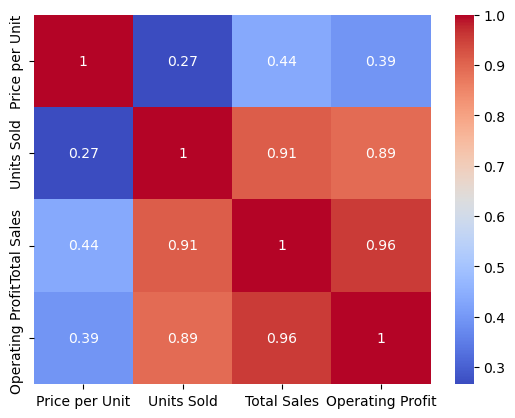

In [41]:
# Generate a correlation matrix
corr = df.corr()

# Plot a heatmap of the correlation matrix using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Display the plot
plt.show()

<h4>Observations:</h4>
<p>From  the above heatmap gives correlation between all the variables if the correlation is near to 1 then two variables are strongly correlated </p><br>
* Total sales and Operating Profit is more correlated as it is 0.96<br>
* As Total sales increasing Operating profit increases